In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import *

%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../JbiclustGE/simulated_data/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "DeBi"
tool_suffix = "DeBi"
n_runs = 1

parameters = (("p",["u"]),("b",[0.5, 0.75, 1.0, 1.25, 1.5, 2.0, 2.5]), ("o",[0.5, 0.75, 1.0])) # b == binarization_level 

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap

img_outdir = "../simulated_datasets/results/J/img"
tsv_outdir = "../simulated_datasets/results/J/"



In [4]:
#for f_path in os.listdir("../JbiclustGE/simulated_data/DeBi/p=u,b=1.0/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT/Results_biclustering/"):
#    print(f_path)

In [5]:
for g in g_sizes:
    for s in s_sizes:
        params_folder = "p=u,b=1.0,o=0.75"
        pred_bic_fname = pred_bic_fname_prefix+str(g)+","+str(s)+pred_bic_fname_suffix
        bic_file_path = pred_bic_dir+params_folder+"/" + pred_bic_fname
        bics = parse_JBiclustGE(bic_file_path,n_runs=n_runs)[0]
        print(g,"x",s,len(bics))

5 x 10 628
5 x 20 627
5 x 50 677
5 x 100 643
10 x 10 686
10 x 20 636
10 x 50 632
10 x 100 622
20 x 10 617
20 x 20 584
20 x 50 588
20 x 100 618
50 x 10 572
50 x 20 457
50 x 50 448
50 x 100 370
100 x 10 404
100 x 20 336
100 x 50 270
100 x 100 203


In [6]:
true_bic_fname = true_bic_fname_prefix+str(10)+","+str(100)+true_bic_fname_suffix 
true_bics = read_true_bics(true_bic_dir+true_bic_fname)


params_folder = "p=u,b=1.0"
#params_folder = "prob_gene=0.99,pvalue_cond=0.05,pvalue_correl=0.05,zscore_cond=0.5"
pred_bic_fname = pred_bic_fname_prefix+str(10)+","+str(100)+pred_bic_fname_suffix
pred_bic_fname
bic_file_path = pred_bic_dir+params_folder+"/" + pred_bic_fname
bic_file_path 

'../JbiclustGE/simulated_data/DeBi/p=u,b=1.0/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT'

In [7]:
runs = parse_JBiclustGE(bic_file_path,n_runs=1)
for i in range(0,n_runs):
    pred_bics = runs[i] 
    print(i, np.mean(F1_per_bic(true_bics, pred_bics)) )


0 0.026076984083171495


In [8]:
results= read_all_results(parameters,tool_name,n_runs=n_runs, parse_biclust_func=parse_JBiclustGE,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix,
                          param_folder_delim=",")
results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

Parameter combiations not found: 0
Successfull parameter combinations: 21
	files not found: 0
	files empty: 0
	failed to parse: 0
Total runs 420
Non-zero runs: 384


In [9]:
results["Geometric_Mean"] = np.sqrt(results["Relevance"]*results["Recovery"])
results

,n_genes,n_samples,p,b,o,n_biclusters,Relevance,Recovery,Geometric_Mean
0,5,10,u,0.5,0.50,849,0.001927,0.023701,0.006757
1,5,20,u,0.5,0.50,832,0.005794,0.195791,0.033681
2,5,50,u,0.5,0.50,834,0.007335,0.228840,0.040969
3,5,100,u,0.5,0.50,853,0.007521,0.257034,0.043968
4,10,10,u,0.5,0.50,885,0.003869,0.066725,0.016067
5,10,20,u,0.5,0.50,852,0.014095,0.332923,0.068503
6,10,50,u,0.5,0.50,875,0.014807,0.359458,0.072955
7,10,100,u,0.5,0.50,846,0.014615,0.366789,0.073215
8,20,10,u,0.5,0.50,877,0.007860,0.139031,0.033058
9,20,20,u,0.5,0.50,844,0.024094,0.416998,0.100236


In [11]:
parameters

(('p', ['u']),
 ('b', [0.5, 0.75, 1.0, 1.25, 1.5, 2.0, 2.5]),
 ('o', [0.5, 0.75, 1.0]))

Total combinations: 21
[('u', 1.5, 1.0) ('u', 1.5, 0.5) ('u', 1.5, 0.75) ('u', 2.0, 1.0)
 ('u', 2.0, 0.5) ('u', 1.25, 1.0) ('u', 1.25, 0.5) ('u', 2.0, 0.75)
 ('u', 1.0, 0.5) ('u', 1.0, 1.0) ('u', 0.75, 0.5) ('u', 0.75, 1.0)
 ('u', 0.5, 0.5) ('u', 0.5, 1.0) ('u', 1.25, 0.75) ('u', 1.0, 0.75)
 ('u', 0.75, 0.75) ('u', 0.5, 0.75) ('u', 2.5, 0.75) ('u', 2.5, 0.5)]
Top 20 paramter combinations


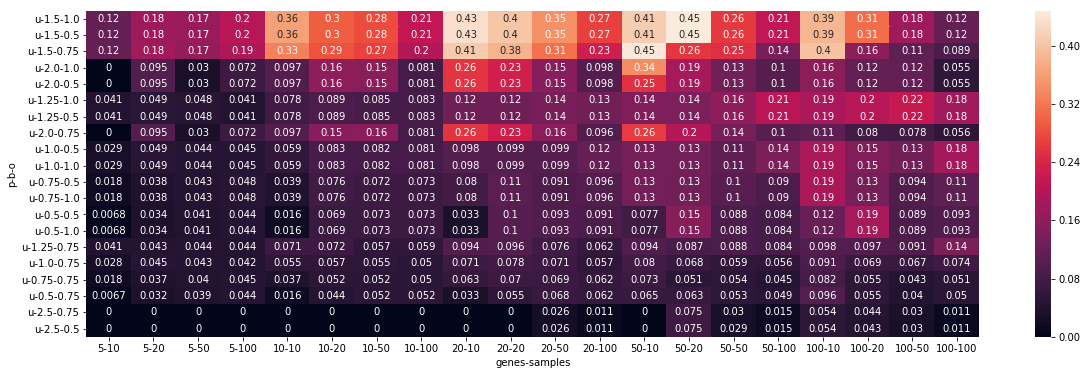

In [16]:
heatmap = plot_performance_heatmap(results,params,top=20,what="Geometric_Mean",
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [17]:
parameters

(('p', ['u']),
 ('b', [0.5, 0.75, 1.0, 1.25, 1.5, 2.0, 2.5]),
 ('o', [0.5, 0.75, 1.0]))

In [18]:
default_params = ("u",1.0,0.5)

In [19]:
r = get_opt_params(results, params, heatmap, default_params=default_params, what="Geometric_Mean", more_n_smaples = 0)
r

All 420 runs considered

with Optimal parameters (Geometric_Mean --> max):
Geometric_Mean : 0.2800605607483052
('u', 1.5, 1.0)
0.12	0.18	0.17	0.2	0.36	0.3	0.28	0.21	0.43	0.4	0.35	0.27	0.41	0.45	0.26	0.21	0.39	0.31	0.18	0.12
('u', 1.5, 0.5)
0.12	0.18	0.17	0.2	0.36	0.3	0.28	0.21	0.43	0.4	0.35	0.27	0.41	0.45	0.26	0.21	0.39	0.31	0.18	0.12
	p=('Geometric_Mean', 'mean');
	b=('Geometric_Mean', 'std');
	o=('Geometric_Mean', 'count');
	Max. avg. Geometric_Mean: 0.28 ± 0.105
	Max. avg. Relevance: 0.214 ± 0.075
	Max. avg. Recovery: 0.374 ± 0.167
	Max. avg. n_biclusters: 51.45 ± 34.494
With Default parameters:
('u', 1.0, 0.5)
0.03	0.05	0.04	0.04	0.06	0.08	0.08	0.08	0.1	0.1	0.1	0.12	0.13	0.13	0.11	0.14	0.19	0.15	0.13	0.18
	p=u;
	b=1.0;
	o=0.5;
	avg. Geometric_Mean: 0.102 ± 0.045
	avg. Relevance: 0.026 ± 0.017
	avg. Recovery: 0.426 ± 0.119
	avg. n_biclusters: 614.05 ± 135.46


Geometric_Mean Relevance  Recovery n_biclusters
                    mean      mean      mean         mean
p b   o                                                  
u 1.5 1.0       0.280061  0.214068  0.373946        51.45
      0.5       0.280061  0.214068  0.373946        51.45